In [1]:

#train(model,loss_func,X,y,epochs=1000,batch_size = 32,lr=0.01):
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
from dynamic_architect import Neural_Network
from data.generate import generate_circle_data 
from layers import Linear 
from activations import ReLU , Sigmoid
from losses import BCE 
from train_loop import train ,show_loss
import numpy as np

np.set_printoptions(suppress=True) 
depth2 = Neural_Network([2,16,16,1]) 
model = depth2.layers 
X,y =  generate_circle_data(2000,0.5,42)
loss_func = BCE()
loss_history = train(model,loss_func,X,y,1000,32,0.001) #ba số cuối đã luôn cố định 

batch_per_epoch = int(np.ceil(len(X) / 32))
epoch_loss = [
    np.mean(loss_history[i*batch_per_epoch:(i+1)*batch_per_epoch])
    for i in range(1000)
]
show_loss(epoch_loss ,50) 
 



EPOCHS : 0 | LOSS:  0.4104922984789146
EPOCHS : 50 | LOSS:  0.05705191513473166
EPOCHS : 100 | LOSS:  0.0360814037940066
EPOCHS : 150 | LOSS:  0.026996449967543176
EPOCHS : 200 | LOSS:  0.02247131492369986
EPOCHS : 250 | LOSS:  0.01960485558474117
EPOCHS : 300 | LOSS:  0.018134042378511083
EPOCHS : 350 | LOSS:  0.01637184059475834
EPOCHS : 400 | LOSS:  0.014889005777759213
EPOCHS : 450 | LOSS:  0.013935306380252782
EPOCHS : 500 | LOSS:  0.013092966037176374
EPOCHS : 550 | LOSS:  0.012285911086306498
EPOCHS : 600 | LOSS:  0.011817809567906025
EPOCHS : 650 | LOSS:  0.011256229729915702
EPOCHS : 700 | LOSS:  0.010453462387515234
EPOCHS : 750 | LOSS:  0.010071335505772053
EPOCHS : 800 | LOSS:  0.009637979509310897
EPOCHS : 850 | LOSS:  0.009213603555861219
EPOCHS : 900 | LOSS:  0.010132479344493274
EPOCHS : 950 | LOSS:  0.008846619420091763


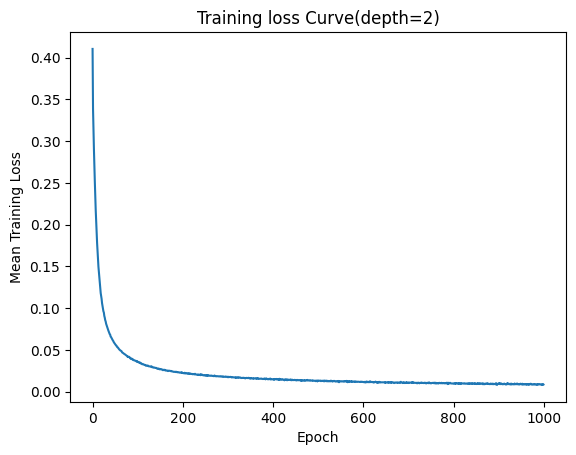

In [2]:
import matplotlib.pyplot as plt 
plt.plot(epoch_loss)
plt.xlabel("Epoch")
plt.ylabel("Mean Training Loss") 
plt.title("Training loss Curve(depth=2)")
plt.show()


In [3]:
last_100 = epoch_loss[900:]
for i in range(0,100,10): 
    print(" ".join(f"{x:8.4f}" for x in last_100[i:i+10]))

  0.0101   0.0095   0.0102   0.0091   0.0094   0.0100   0.0093   0.0094   0.0089   0.0094
  0.0092   0.0090   0.0098   0.0094   0.0091   0.0090   0.0086   0.0091   0.0092   0.0104
  0.0091   0.0097   0.0096   0.0090   0.0094   0.0092   0.0088   0.0098   0.0088   0.0095
  0.0092   0.0090   0.0090   0.0089   0.0089   0.0099   0.0091   0.0094   0.0090   0.0096
  0.0091   0.0098   0.0090   0.0090   0.0093   0.0088   0.0088   0.0094   0.0096   0.0093
  0.0088   0.0093   0.0097   0.0086   0.0091   0.0090   0.0089   0.0088   0.0093   0.0091
  0.0087   0.0092   0.0085   0.0092   0.0089   0.0087   0.0090   0.0085   0.0090   0.0089
  0.0097   0.0091   0.0095   0.0087   0.0085   0.0089   0.0089   0.0091   0.0087   0.0091
  0.0093   0.0086   0.0086   0.0089   0.0091   0.0084   0.0082   0.0092   0.0091   0.0093
  0.0090   0.0091   0.0087   0.0087   0.0086   0.0091   0.0085   0.0088   0.0082   0.0086


In [4]:
#tính accuracy
def Predict(X,model): 
    A = X 
    for layer in model: 
        A = layer.forward(A) 
    return A

y_hat = Predict(X,model) 
y_pred = (y_hat > 0.5).astype(int)
accuracy = np.mean(y_pred == y)
print(accuracy)

0.998
